# Análisis de resultados experimentales

### Lectura de datos

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

path_radial_basis = 'Resultados/radial_basis_kernel/'


#  Radial Basis
radial_basis_non_stratified_k_fold = pd.read_csv(path_radial_basis + 'non_stratified_k_fold.csv', index_col=0, sep=";")


### Número de características vs. Número de cortes

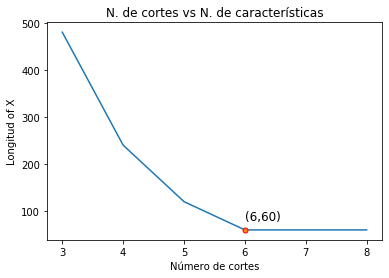

In [10]:
pairs = radial_basis_non_stratified_k_fold[['Number of cuts','Length of X']].copy()
pairs.drop_duplicates(inplace=True)


length_x = pairs['Length of X'].tolist()
number_of_cuts = pairs['Number of cuts'].tolist()

plt.plot(number_of_cuts,
         length_x)

plt.plot(6,60,marker="o", markersize=5, markeredgecolor="red")

plt.text(6, 80, '(6,60)', fontsize=12)
plt.title("N. de cortes vs N. de características")
plt.xlabel("Número de cortes")
plt.ylabel("Longitud of X")
plt.show()

# Radial_basis_kernel

## non_stratified_k_fold

#### Matriz de correlaciones entre datos experimentales

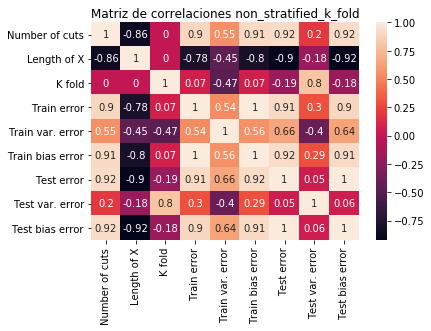

In [11]:
corrMatrix= radial_basis_non_stratified_k_fold.corr()
corrMatrix = corrMatrix.round(2)
sn.heatmap(corrMatrix, annot=True)
plt.title("Matriz de correlaciones non_stratified_k_fold")
plt.show()

### Número de fold vs. Error

#### Training

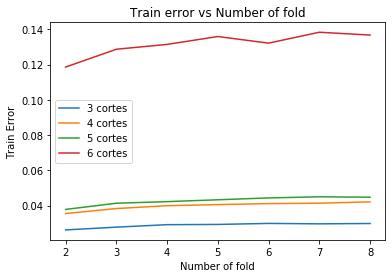

In [12]:
number_of_cuts = range(3,7,1)
number_of_cuts

for cut in number_of_cuts:
    filtered_data = radial_basis_non_stratified_k_fold[(radial_basis_non_stratified_k_fold['Number of cuts'] == cut)]
    plt.plot(filtered_data['K fold'],filtered_data['Train error'], label = f'{cut} cortes')
    
plt.legend(loc="center left")
plt.title("Train error vs Number of fold")
plt.xlabel("Number of fold")
plt.ylabel("Train Error")
plt.show()

#### Test

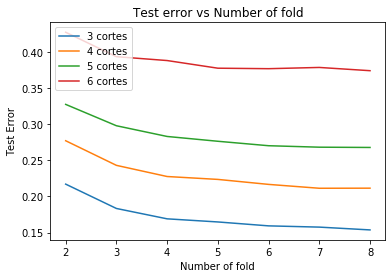

In [13]:
number_of_cuts = range(3,7,1)


for cut in number_of_cuts:
    filtered_data = radial_basis_non_stratified_k_fold[(radial_basis_non_stratified_k_fold['Number of cuts'] == cut)]
    plt.plot(filtered_data['K fold'],filtered_data['Test error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Test error vs Number of fold")
plt.xlabel("Number of fold")
plt.ylabel("Test Error")
plt.show()

### Número de cortes vs. Error

#### Training

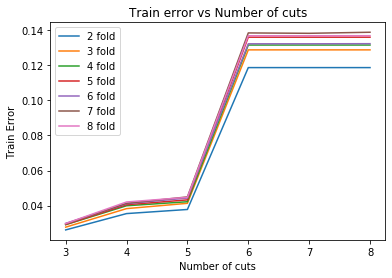

In [14]:
k_fold = radial_basis_non_stratified_k_fold['K fold'].unique()
k_fold

for k_subset in k_fold:
    filtered_data = radial_basis_non_stratified_k_fold[(radial_basis_non_stratified_k_fold['K fold'] == k_subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Train error'], label = f'{k_subset} fold')
    
    
plt.legend(loc="upper left")
plt.xlabel("Number of cuts")
plt.title("Train error vs Number of cuts")
plt.ylabel("Train Error")
plt.show()

### Test

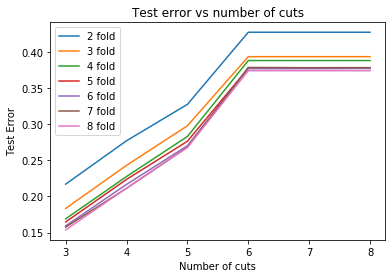

In [15]:
k_fold = radial_basis_non_stratified_k_fold['K fold'].unique()
k_fold


for k_subset in k_fold:
    filtered_data = radial_basis_non_stratified_k_fold[(radial_basis_non_stratified_k_fold['K fold'] == k_subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Test error'], label = f'{k_subset} fold')
    
plt.legend(loc="upper left")
plt.xlabel("Number of cuts")
plt.title("Test error vs number of cuts")
plt.ylabel("Test Error")
plt.show()

### Número de cortes vs. Varianza

#### Training

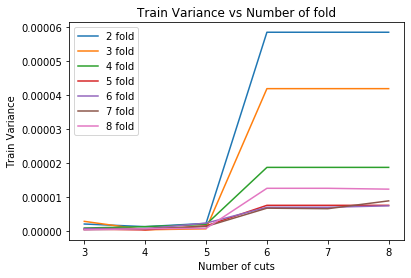

In [16]:
k_fold = radial_basis_non_stratified_k_fold['K fold'].unique()


for subset in k_fold:
    filtered_data = radial_basis_non_stratified_k_fold[(radial_basis_non_stratified_k_fold['K fold'] == subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Train var. error'], label = f'{subset} fold')
    
plt.legend(loc="upper left")
plt.title("Train Variance vs Number of fold")
plt.xlabel("Number of cuts")
plt.ylabel("Train Variance")
plt.show()

#### Test

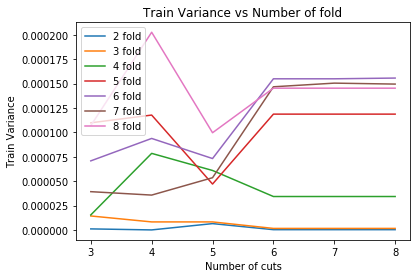

In [17]:
k_fold = radial_basis_non_stratified_k_fold['K fold'].unique()


for subset in k_fold:
    filtered_data = radial_basis_non_stratified_k_fold[(radial_basis_non_stratified_k_fold['K fold'] == subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Test var. error'], label = f'{subset} fold')
    
plt.legend(loc="upper left")
plt.title("Train Variance vs Number of fold")
plt.xlabel("Number of cuts")
plt.ylabel("Train Variance")
plt.show()

### Número de cortes vs. Bias

#### Training

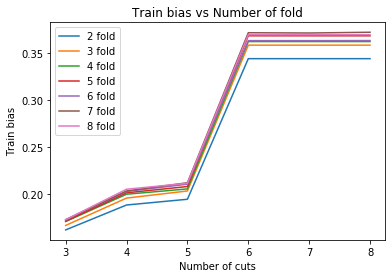

In [18]:
k_fold = radial_basis_non_stratified_k_fold['K fold'].unique()


for subset in k_fold:
    filtered_data = radial_basis_non_stratified_k_fold[(radial_basis_non_stratified_k_fold['K fold'] == subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Train bias error'], label = f'{subset} fold')
    
plt.legend(loc="upper left")
plt.title("Train bias vs Number of fold")
plt.xlabel("Number of cuts")
plt.ylabel("Train bias")
plt.show()

#### Test

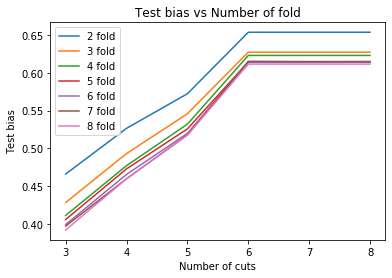

In [19]:
k_fold = radial_basis_non_stratified_k_fold['K fold'].unique()


for subset in k_fold:
    filtered_data = radial_basis_non_stratified_k_fold[(radial_basis_non_stratified_k_fold['K fold'] == subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Test bias error'], label = f'{subset} fold')
    
plt.legend(loc="upper left")
plt.title("Test bias vs Number of fold")
plt.xlabel("Number of cuts")
plt.ylabel("Test bias")
plt.show()

### Number of folds vs Test Variance

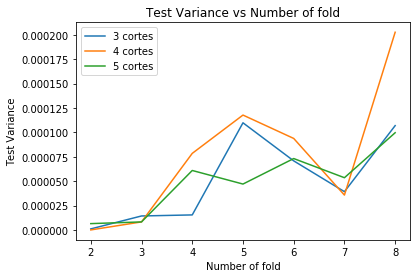

In [31]:
number_of_cuts = range(3,6,1)
number_of_cuts

for cut in number_of_cuts:
    filtered_data = radial_basis_non_stratified_k_fold[(radial_basis_non_stratified_k_fold['Number of cuts'] == cut)]
    plt.plot(filtered_data['K fold'],filtered_data['Test var. error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Test Variance vs Number of fold")
plt.xlabel("Number of fold")
plt.ylabel("Test Variance")
plt.show()

### Selección mayor y peor error

In [35]:
radial_basis_non_stratified_k_fold.sort_values(by='Test bias error', ascending = True, inplace = True)
radial_basis_non_stratified_k_fold.head(10)


mejor_modelo_tradeoff = radial_basis_non_stratified_k_fold.iloc[6]
# #eleccion en base de la mayor varianza dentro del top 10 menores bias. Buen trade-off

radial_basis_non_stratified_k_fold.sort_values(by='Test bias error', ascending = False, inplace = True)
radial_basis_non_stratified_k_fold.head(10)

peor_modelo_tradeoff = radial_basis_non_stratified_k_fold.iloc[0]
peor_modelo_tradeoff
#eleccion en base de la menor varianza dentro del top 10 mayores bias. Pesimo trade-off



Number of cuts                          8
Length of X                            60
K fold                                  2
Train error                      0.118619
Train var. error              5.84384e-05
Train bias error                 0.344326
Train list errors    [0.126263, 0.110974]
Test error                       0.427296
Test var. error               2.69361e-07
Test bias error                  0.653679
Test list errors     [0.426777, 0.427815]
Name: 35, dtype: object